In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [14]:
file = "../Resources/police_reports_clean.csv"

police_reports = pd.read_csv(file)
police_reports

,Incident Datetime,Incident Date,Incident Year,Incident Day of Week,Report Datetime,Report Type Description,Filed Online,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,Police District,Analysis Neighborhood,Latitude,Longitude,Incident Time,Report Time,Report Date
0,2021-08-03 10:00:00,2021-08-03,2021,Tuesday,2021-08-15 15:40:00,Initial,False,Fraud,Fraud,Fraudulent Use Of Automated Teller Card,Open or Active,04TH ST \ HOWARD ST,Southern,Financial District/South Beach,37.783259,-122.402708,10:00:00,15:40:00,2021-08-15
1,2021-11-23 07:38:00,2021-11-23,2021,Tuesday,2021-11-23 11:14:00,Initial,False,Arson,Arson,Arson,Open or Active,FILLMORE ST \ PAGE ST,Northern,Hayes Valley,37.773039,-122.430629,07:38:00,11:14:00,2021-11-23
2,2018-03-16 19:45:00,2018-03-16,2018,Friday,2018-03-16 23:30:00,Initial,False,Assault,Simple Assault,Battery,Open or Active,JONES ST \ POST ST,Central,Tenderloin,37.787664,-122.413354,19:45:00,23:30:00,2018-03-16
3,2019-09-03 08:25:00,2019-09-03,2019,Tuesday,2019-09-04 14:53:00,Initial,False,Lost Property,Lost Property,Lost Property,Open or Active,07TH ST \ BRANNAN ST,Southern,South of Market,37.773051,-122.403205,08:25:00,14:53:00,2019-09-04
4,2020-01-01 00:00:00,2020-01-01,2020,Wednesday,2021-06-23 13:49:00,Initial,False,Fraud,Fraud,"False Claims, Presenting to Government",Open or Active,47TH AVE \ WAWONA ST,Taraval,Sunset/Parkside,37.736135,-122.505297,00:00:00,13:49:00,2021-06-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411293,2021-05-19 15:00:00,2021-05-19,2021,Wednesday,2021-05-20 07:09:00,Vehicle Initial,False,Motor Vehicle Theft,Motor Vehicle Theft,"Vehicle, Stolen & Recovered",Open or Active,SANTIAGO ST \ 24TH AVE,Taraval,Sunset/Parkside,37.744681,-122.481181,15:00:00,07:09:00,2021-05-20
411294,2021-11-22 09:00:00,2021-11-22,2021,Monday,2021-11-24 13:29:00,Initial,False,Malicious Mischief,Vandalism,"Malicious Mischief, Vandalism to Vehicle",Open or Active,TAYLOR ST \ SACRAMENTO ST,Central,Nob Hill,37.792552,-122.412650,09:00:00,13:29:00,2021-11-24
411295,2021-08-13 00:10:00,2021-08-13,2021,Friday,2021-08-13 03:15:00,Initial,False,Non-Criminal,Non-Criminal,Found Property,Open or Active,TAYLOR ST \ POST ST,Central,Nob Hill,37.787872,-122.411699,00:10:00,03:15:00,2021-08-13
411296,2021-05-19 11:30:00,2021-05-19,2021,Wednesday,2021-05-19 11:36:00,Initial,False,Other Miscellaneous,Other,Investigative Detention,Open or Active,SELBY ST \ QUESADA AVE,Bayview,Bayview Hunters Point,37.738649,-122.400808,11:30:00,11:36:00,2021-05-19


In [15]:
police_reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411298 entries, 0 to 411297
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Incident Datetime        411298 non-null  object 
 1   Incident Date            411298 non-null  object 
 2   Incident Year            411298 non-null  int64  
 3   Incident Day of Week     411298 non-null  object 
 4   Report Datetime          411298 non-null  object 
 5   Report Type Description  411298 non-null  object 
 6   Filed Online             411298 non-null  bool   
 7   Incident Category        411298 non-null  object 
 8   Incident Subcategory     411298 non-null  object 
 9   Incident Description     411298 non-null  object 
 10  Resolution               411298 non-null  object 
 11  Intersection             411298 non-null  object 
 12  Police District          411298 non-null  object 
 13  Analysis Neighborhood    411298 non-null  object 
 14  Lati

In [16]:
police_reports["Incident Year"].value_counts()

2018    87581
2019    86776
2022    81141
2021    81009
2020    74791
Name: Incident Year, dtype: int64

In [17]:
# converting the following into datetime format in order to group by month
police_reports["Incident Datetime"] = pd.to_datetime(police_reports["Incident Datetime"])
police_reports["Report Datetime"] = pd.to_datetime(police_reports["Report Datetime"])

In [18]:
# changing Date and Time data types
police_reports["Incident Time"] = police_reports["Incident Datetime"].dt.time
police_reports["Report Time"] = police_reports["Report Datetime"].dt.time

police_reports["Incident Time"] = police_reports["Incident Datetime"].dt.time
police_reports["Report Time"] = police_reports["Report Datetime"].dt.time

In [19]:
# copying the police_reports df
incident_reports = police_reports.copy()

In [20]:
# making sure it kept the datetime
incident_reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411298 entries, 0 to 411297
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Incident Datetime        411298 non-null  datetime64[ns]
 1   Incident Date            411298 non-null  object        
 2   Incident Year            411298 non-null  int64         
 3   Incident Day of Week     411298 non-null  object        
 4   Report Datetime          411298 non-null  datetime64[ns]
 5   Report Type Description  411298 non-null  object        
 6   Filed Online             411298 non-null  bool          
 7   Incident Category        411298 non-null  object        
 8   Incident Subcategory     411298 non-null  object        
 9   Incident Description     411298 non-null  object        
 10  Resolution               411298 non-null  object        
 11  Intersection             411298 non-null  object        
 12  Police District 

In [21]:
crime_counts = incident_reports.groupby(["Incident Category"]).count()["Incident Datetime"]

In [22]:
# shows the number of crimes per month
month_groupby = incident_reports.groupby([incident_reports['Incident Datetime'].dt.month]).count()["Incident Datetime"]
month_groupby = pd.DataFrame(month_groupby)
# # month_groupby = month_groupby.sort_values("Incident Datetime", ascending=False)
month_groupby

# syntax: (campaign.groupby([campaign['date'].dt.month]).agg (avg_interviews_month = ('num_interviews' , 'mean')).round())

,Incident Datetime
Incident Datetime,
1,35011
2,31753
3,33164
4,32034
5,33971
6,33780
7,35871
8,35871
9,35496


In [23]:
# shows the number of crimes per month, per year
year_month_groupby = incident_reports.groupby([incident_reports['Incident Year'], 
                                               incident_reports['Incident Datetime'].dt.month]).count()["Report Datetime"]
year_month_groupby = pd.DataFrame(year_month_groupby)
# # year_month_groupby.reset_index()
# year_month_groupby.index.names = ["Incident Year", "Incident Month"]
# # year_month_groupby.columns = ['Incident Year', 'Incident Month', 'Incident Count']
# year_month_groupby['Incident Year-Incident Month'] = year_month_groupby['Incident Year'].astype(str) + '-' + year_month_groupby['Incident Month'].astype(str).str.zfill(2)
year_month_groupby

Report Datetime
Incident Year Incident Datetime                 
2018          1                             7374
              2                             6636
              3                             7118
              4                             7187
              5                             7387
              6                             7206
              7                             7888
              8                             7912
              9                             7435
              10                            7500
              11                            6805
              12                            7133
2019          1                             7075
              2                             6240
              3                             6819
              4                             6950
              5                             7257
              6                             7115
              7                             7607
              8                             7919
              9                             7559
              10                            7997
              11                            7139
              12                            7099
2020          1                             7404
              2                             6808
              3                             6113
              4                             5081
              5                             6044
              6                             5799
              7                             6372
              8                             6067
              9                             5913
              10                            6306
              11                            6308
              12                            6576
2021          1                             6693
              2                             5956
              3                             6135
              4                             6076
              5                             6822
              6                             6930
              7                             6959
              8                             6947
              9                             7180
              10                            7393
              11                            7202
              12                            6716
2022          1                             6465
              2                             6113
              3                             6979
              4                             6740
              5                             6461
              6                             6730
              7                             7045
              8                             7026
              9                             7409
              10                            7130
              11                            6470
              12                            6573

/Users/megvogel/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


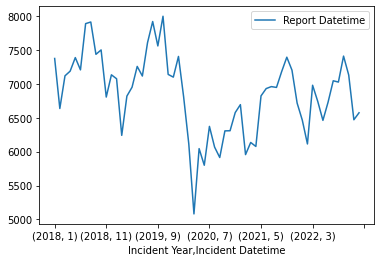

In [25]:
# plt.xticks(year_month_groupby["Report Datetime"], year_month_groupby.index.values)
# plt.plot(year_month_groupby["Report Datetime"])
year_month_groupby.plot()
plt.show()

In [ ]:
# year_month_groupby = incident_reports.groupby([incident_reports['Incident Datetime'].dt.year, incident_reports['Incident Datetime'].dt.month]).count()["Report Datetime"]
# year_month_groupby = pd.DataFrame(year_month_groupby)

In [ ]:
# year_month_groupby.columns

In [ ]:
# year_month_groupby = incident_reports.groupby([incident_reports['Incident Datetime'].dt.year, incident_reports['Incident Datetime'].dt.month]).count()["Report Datetime"]
# year_month_groupby = pd.DataFrame(year_month_groupby)

# # year_month_groupby.columns = ['Incident Year', 'Incident Month', 'Incident Count']
# year_month_groupby.index.names = ["Incident Year", "Incident Month"]
# year_month_groupby.reset_index(inplace=True)
# year_month_groupby['Incident Year-Incident Month'] = year_month_groupby['Incident Year'].astype(str) + '-' + year_month_groupby['Incident Month'].astype(str).str.zfill(2)


# fig, ax = plt.subplots()
# ax.plot(year_month_groupby['Incident Year-Incident Month'], year_month_groupby['Incident Count'])
# ax.set_xlabel('Year-Month')
# ax.set_ylabel('Incident Count')
# ax.set_title('Incidents per Month')
# plt.xticks(rotation=45)
# plt.show()

In [ ]:
# need to group this by neighborhood
# need crime rate


In [ ]:
# year_month_groupby.reset_index(drop=True)

In [ ]:
# def extract_year_month(date_str):
#     return ‘-’.join(date_str.split(‘-’)[:2])
# police_report[‘Incident Date’] = police_report[‘Incident Date’].apply(extract_year_month)
# police_report.head()

In [ ]:
# making dataframes based on type of crime
# violent_crimes = ["Assult", "Larceny Theft", "Burglary", "Motor Vehicle Theft", "Robbery",
#                   "Weapons Offense", "Arson", "Rape", "Homicide",
#                   "Human Trafficking"]

# nonviolent_crimes = ["Malicious Mischeif", "Other Miscellaneous", "Fraud", "Drug Offense",
#                      "Disorderly Conduct", "Offences Against The Family And Children",
#                      "Traffic Violation Arrest", "Weapons Carrying Etc",
#                      "Stolen Property", "Forgery and Counterfeiting", "Traffic Collision",
#                      "Vandalism", "Prostitution", "Embezzlement", "Civil Sidewalks",
#                      "Sex Offense", "Drug Violation", "Malicious Mischief", "Gambling"]

# misc_disturbance = ["Liquor Laws ", "Missing Person", "Suspicious Activity", "Miscellaneous Investigation",
#         "Other Offenses", "Courtesy Report", "Fire Report", "Vehicle Impounded", "Suicide"]

# get_rid_of = ["Non-Criminal", "Recovered Vehicles", "Lost Property", "Warrant", "Other", 
#               "Case Closure", "Vehicle Misplaced"]


# violent_crimes_df = incident_reports.loc[incident_reports["Incident Category"].isin(violent_crimes)]
# nonviolent_crimes_df = incident_reports.loc[incident_reports["Incident Category"].isin(nonviolent_crimes)]
# misc_disturbance_df = incident_reports.loc[incident_reports["Incident Category"].isin(misc_disturbance)]